In [28]:
import os
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
local_zip = 'archive/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/Dicoding Training/code/dataset')
zip_ref.close()

In [13]:
base_dir = 'dataset/Chessman-image-dataset/Chess'
os.listdir(base_dir)

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [25]:
for filename in os.listdir(base_dir):
    f = os.path.join(base_dir, filename)
    length = len(os.listdir(f))
    print(f"{filename}\t: {length} images")

Bishop	: 87 images
King	: 76 images
Knight	: 106 images
Pawn	: 107 images
Queen	: 78 images
Rook	: 102 images


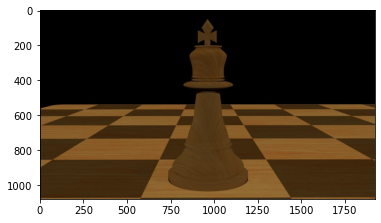

In [27]:
img = image.load_img(base_dir + '/King/00000145.png')
imgplot = plt.imshow(img)

In [29]:
train_dir = os.path.join(base_dir)
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.1
)


In [30]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [34]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 64)        1

In [37]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=150,
    verbose=2
)

Epoch 1/150
63/63 - 16s - loss: 1.8589 - accuracy: 0.1824 - val_loss: 1.7848 - val_accuracy: 0.1923 - 16s/epoch - 252ms/step
Epoch 2/150
63/63 - 14s - loss: 1.7880 - accuracy: 0.1924 - val_loss: 1.7754 - val_accuracy: 0.2115 - 14s/epoch - 219ms/step
Epoch 3/150
63/63 - 13s - loss: 1.7873 - accuracy: 0.1924 - val_loss: 1.7675 - val_accuracy: 0.1923 - 13s/epoch - 213ms/step
Epoch 4/150
63/63 - 14s - loss: 1.7590 - accuracy: 0.2244 - val_loss: 1.7758 - val_accuracy: 0.2115 - 14s/epoch - 220ms/step
Epoch 5/150
63/63 - 23s - loss: 1.7244 - accuracy: 0.2465 - val_loss: 1.7221 - val_accuracy: 0.3077 - 23s/epoch - 371ms/step
Epoch 6/150
63/63 - 23s - loss: 1.6896 - accuracy: 0.2745 - val_loss: 1.6636 - val_accuracy: 0.3269 - 23s/epoch - 371ms/step
Epoch 7/150
63/63 - 24s - loss: 1.6735 - accuracy: 0.3186 - val_loss: 1.6553 - val_accuracy: 0.2308 - 24s/epoch - 387ms/step
Epoch 8/150
63/63 - 25s - loss: 1.6106 - accuracy: 0.3186 - val_loss: 1.5791 - val_accuracy: 0.3462 - 25s/epoch - 390ms/step


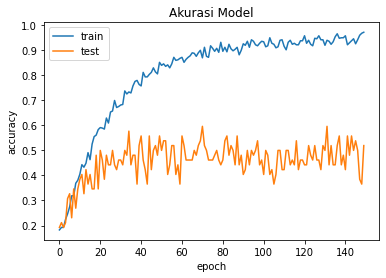

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

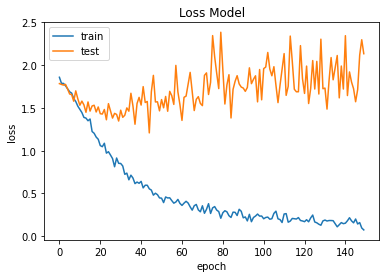

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()